<a href="https://colab.research.google.com/github/alayna302004/digital-calendar-amazon-e-commerce/blob/main/digital_calendar_amazon_e_commerce_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Calendar Amazon E-Commerce Review Analysis - by Alayna Smith

In [ ]:
!pip install gensim
import pandas as pd
import altair as alt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt_tab')
nltk.download('stopwords')
from wordcloud import STOPWORDS
from collections import Counter
import re
from wordcloud import WordCloud
!pip install transformers
from transformers import pipeline
from gensim.models import Phrases

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Adding Sentiment Analysis to Data

In [ ]:
reviews1 = pd.read_csv("Review data - Changing 10.1.csv")
reviews1 = reviews1[['Body', 'Rating']].dropna()
reviews1['Sentiment'] = reviews1['Body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
reviews1_sorted = reviews1.sort_values(by='Sentiment', ascending=True)
reviews1_sorted

,Body,Rating,Sentiment
1,"The screen barely works, no stylus was include...",1,-0.403333
18,"Product quit working in less than a month , no...",1,-0.183333
19,Basically a cheap tablet with an even cheaper ...,1,-0.180000
8,It's so small like a tablet it's the same as u...,3,-0.125000
7,"Versatile, and you can use different google se...",5,0.000000
17,It worked great for what I paid for 4 months t...,1,0.010000
28,Google Home and Google Calendar have completel...,5,0.050000
2,I was actually very surprised at the quality a...,5,0.066868
5,It froze on a white screen several times when ...,3,0.083333
0,"With no reviews, I took a chance on this displ...",5,0.122070


In [ ]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Body       30 non-null     object 
 1   Rating     30 non-null     int64  
 2   Sentiment  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [ ]:
score_rating = alt.Chart(reviews1).mark_boxplot(size=30).encode(
    x='Rating',
    y='Sentiment'
  ).properties(
    width=500,
    height=400,
    title='Sentiment Score by Star Rating'
  )
score_rating

alt.Chart(...)

## Review Counts per Rating

In [ ]:
rating_count = alt.Chart(reviews1).mark_bar(size=50).encode(
    x='Rating',
    y='count()'
  ).properties(
    width=500,
    height=400,
    title='Count of Reviews per Rating'
  )
rating_count

alt.Chart(...)

## Topic Modeling - Making Tokens

In [ ]:
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews1['tokens'] = reviews1['Body'].apply(preprocess)
reviews1

,Body,Rating,Sentiment,tokens
0,"With no reviews, I took a chance on this displ...",5,0.122070,"[reviews, took, chance, display, considering, ..."
1,"The screen barely works, no stylus was include...",1,-0.403333,"[screen, barely, works, stylus, included, lags..."
2,I was actually very surprised at the quality a...,5,0.066868,"[actually, surprised, quality, needs, met, sev..."
3,I ordered this Changing Smart Display F10s|Can...,4,0.158175,"[ordered, changing, smart, display, touchscree..."
4,Rating: ★★★★★ (5/5)Title: Excellent Smart Cale...,5,0.191342,"[rating, title, excellent, smart, calendar, si..."
5,It froze on a white screen several times when ...,3,0.083333,"[froze, white, screen, several, times, set, re..."
6,Great item,4,0.800000,"[great, item]"
7,"Versatile, and you can use different google se...",5,0.000000,"[versatile, use, different, google, services, ..."
8,It's so small like a tablet it's the same as u...,3,-0.125000,"[small, like, tablet, using, phone]"
9,"Love this calendar, easy to learn how to add a...",5,0.330833,"[love, calendar, easy, learn, add, appointment..."


In [ ]:
dictionary = corpora.Dictionary(reviews1['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews1['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.014*"screen" + 0.014*"calendar" + 0.010*"display" + 0.010*"google" + 0.008*"photo" + 0.008*"frame" + 0.008*"get" + 0.008*"digital" + 0.008*"like" + 0.007*"apps"'),
 (1,
  '0.013*"product" + 0.009*"set" + 0.009*"working" + 0.009*"times" + 0.005*"good" + 0.005*"perfect" + 0.005*"love" + 0.005*"month" + 0.005*"service" + 0.005*"customer"'),
 (2,
  '0.028*"calendar" + 0.016*"google" + 0.015*"great" + 0.012*"easy" + 0.010*"home" + 0.010*"appointments" + 0.009*"like" + 0.009*"quality" + 0.009*"digital" + 0.008*"stand"')]

In [ ]:
dictionary = corpora.Dictionary(reviews1['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews1['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.018*"calendar" + 0.014*"google" + 0.013*"screen" + 0.008*"display" + 0.007*"digital" + 0.007*"even" + 0.007*"apps" + 0.007*"quality" + 0.007*"like" + 0.006*"picture"'),
 (1,
  '0.013*"great" + 0.013*"calendar" + 0.011*"photo" + 0.009*"family" + 0.009*"like" + 0.009*"kids" + 0.007*"set" + 0.007*"easy" + 0.007*"product" + 0.007*"frame"')]

### Filter for <=3 ratings

In [ ]:
negative_reviews = reviews1[reviews1['Rating'] <= 3]
negative_reviews['tokens'] = negative_reviews['Body'].apply(preprocess)

/tmp/ipython-input-88-2711310051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['Body'].apply(preprocess)


In [ ]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.041*"product" + 0.041*"working" + 0.041*"times" + 0.024*"screen" + 0.024*"money" + 0.024*"service" + 0.024*"waste" + 0.024*"emails" + 0.024*"quit" + 0.024*"month"'),
 (1,
  '0.039*"tablet" + 0.022*"sleep" + 0.022*"bucks" + 0.022*"porch" + 0.022*"cheaper" + 0.022*"slapped" + 0.022*"even" + 0.022*"utterly" + 0.022*"reopen" + 0.022*"basically"'),
 (2,
  '0.015*"using" + 0.015*"small" + 0.015*"screen" + 0.015*"phone" + 0.015*"like" + 0.015*"times" + 0.015*"stopped" + 0.015*"paid" + 0.015*"months" + 0.015*"great"')]

### Adding Phrases

In [ ]:
bigram = Phrases(reviews1['tokens'], min_count=3, threshold=5)
bigram_mod = Phrases(bigram[reviews1['tokens']])
reviews1['tokens'] = [bigram[doc] for doc in reviews1['tokens']]
reviews1

,Body,Rating,Sentiment,tokens
0,"With no reviews, I took a chance on this displ...",5,0.122070,"[reviews, took, chance, display, considering, ..."
1,"The screen barely works, no stylus was include...",1,-0.403333,"[screen, barely, works, stylus, included, lags..."
2,I was actually very surprised at the quality a...,5,0.066868,"[actually, surprised, quality, needs, met, sev..."
3,I ordered this Changing Smart Display F10s|Can...,4,0.158175,"[ordered, changing, smart, display, touchscree..."
4,Rating: ★★★★★ (5/5)Title: Excellent Smart Cale...,5,0.191342,"[rating, title, excellent, smart, calendar, si..."
5,It froze on a white screen several times when ...,3,0.083333,"[froze, white, screen, several, times, set, re..."
6,Great item,4,0.800000,"[great, item]"
7,"Versatile, and you can use different google se...",5,0.000000,"[versatile, use, different, google, services, ..."
8,It's so small like a tablet it's the same as u...,3,-0.125000,"[small, like, tablet, using, phone]"
9,"Love this calendar, easy to learn how to add a...",5,0.330833,"[love, calendar, easy, learn, add, appointment..."


In [ ]:
dictionary = corpora.Dictionary(reviews1['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews1['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.015*"calendar" + 0.013*"screen" + 0.011*"love" + 0.011*"easy" + 0.009*"smart" + 0.009*"display" + 0.009*"like" + 0.007*"use" + 0.007*"perfect" + 0.007*"photo"'),
 (1,
  '0.011*"screen" + 0.009*"display" + 0.008*"apps" + 0.008*"device" + 0.008*"much" + 0.008*"power" + 0.007*"calendar" + 0.006*"back" + 0.006*"like" + 0.006*"photos"'),
 (2,
  '0.011*"great" + 0.011*"google" + 0.009*"home" + 0.009*"like" + 0.009*"quality" + 0.009*"set" + 0.009*"calendar" + 0.009*"product" + 0.009*"exactly" + 0.006*"stand"')]

In [ ]:
negative_reviews = reviews1[reviews1['Rating'] <= 3]
negative_reviews['tokens'] = negative_reviews['Body'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-92-1320864994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['Body'].apply(preprocess)


[(0,
  '0.046*"working" + 0.046*"product" + 0.026*"month" + 0.026*"less" + 0.026*"return" + 0.026*"quit" + 0.026*"time" + 0.026*"waste" + 0.026*"calls" + 0.026*"whatsoever"'),
 (1,
  '0.030*"tablet" + 0.030*"least" + 0.030*"basically" + 0.030*"calendar" + 0.030*"back" + 0.030*"slapped" + 0.030*"wake" + 0.030*"reopen" + 0.030*"cheaper" + 0.030*"even"'),
 (2,
  '0.053*"screen" + 0.053*"times" + 0.030*"restart" + 0.030*"several" + 0.030*"apps" + 0.030*"froze" + 0.030*"white" + 0.030*"lags" + 0.030*"works" + 0.030*"bad"')]

## Finding most common words

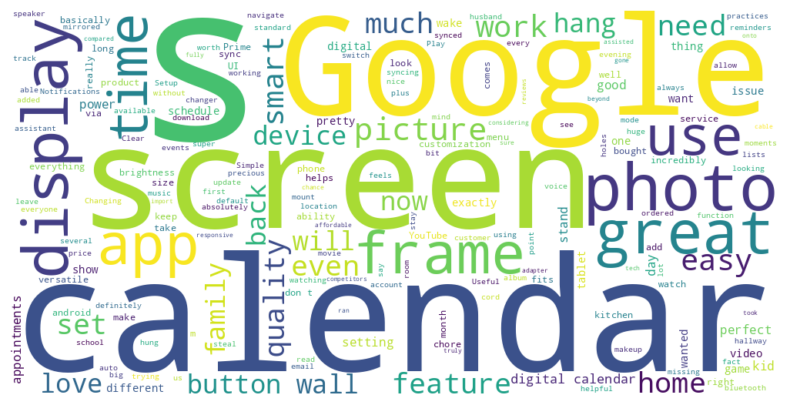

In [ ]:
text = " ".join(reviews1['Body'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [word for word in words if word not in STOPWORDS]
word_counts = Counter(filtered_words)
top_words = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

frequent_words = alt.Chart(top_words).mark_bar().encode(
    x=alt.X('count:Q', title='Frequency'),
    y=alt.Y('word:N', sort='-x', title='Word')
).properties(
    width=500,
    height=500,
    title='Top 20 Most Frequent Words (No Stopwords)'
)
frequent_words

alt.Chart(...)

## Facebook Model

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


## Assigning Reviews to a Label

In [ ]:
candidate_labels = [
    "screen lags",
    "good quality",
    "very small",
    "easy to use",
    "bad quality",
    "very useful"
]

In [ ]:
review = "Does everything I wanted. Perfect for kitchen..watch all your YouTube videos and access your email."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])

Predicted label: good quality
Confidence: 0.4961295425891876


In [ ]:
reviews1['zero_shot_label'] = reviews1['Body'].apply(
    lambda x: classifier(str(x), candidate_labels, multi_label=False)['labels'][0]
)
reviews1

,Body,Rating,Sentiment,tokens,zero_shot_label
0,"With no reviews, I took a chance on this displ...",5,0.122070,"[reviews, took, chance, display, considering, ...",good quality
1,"The screen barely works, no stylus was include...",1,-0.403333,"[screen, barely, works, stylus, included, lags...",bad quality
2,I was actually very surprised at the quality a...,5,0.066868,"[actually, surprised, quality, needs, met, sev...",good quality
3,I ordered this Changing Smart Display F10s|Can...,4,0.158175,"[ordered, changing, smart, display, touchscree...",bad quality
4,Rating: ★★★★★ (5/5)Title: Excellent Smart Cale...,5,0.191342,"[rating, title, excellent, smart, calendar, si...",very useful
5,It froze on a white screen several times when ...,3,0.083333,"[froze, white, screen, several, times, set, re...",screen lags
6,Great item,4,0.800000,"[great, item]",good quality
7,"Versatile, and you can use different google se...",5,0.000000,"[versatile, use, different, google, services, ...",very useful
8,It's so small like a tablet it's the same as u...,3,-0.125000,"[small, like, tablet, using, phone]",very small
9,"Love this calendar, easy to learn how to add a...",5,0.330833,"[love, calendar, easy, learn, add, appointment...",easy to use


In [ ]:
label_counts = reviews1['zero_shot_label'].value_counts().reset_index()
label_counts.columns = ['zero_shot_label', 'count']

alt.Chart(label_counts).mark_bar().encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('zero_shot_label:N', sort='-x', title='Label'),
    color=alt.Color('zero_shot_label:N', scale=alt.Scale(scheme='dark2'), legend=None)
).properties(
    width=800,
    height=400,
    title='Label Distribution'
)

alt.Chart(...)

In [ ]:
reviews1[reviews1['zero_shot_label'] == 'bad quality']

,Body,Rating,Sentiment,tokens,zero_shot_label
1,"The screen barely works, no stylus was include...",1,-0.403333,"[screen, barely, works, stylus, included, lags...",bad quality
3,I ordered this Changing Smart Display F10s|Can...,4,0.158175,"[ordered, changing, smart, display, touchscree...",bad quality
17,It worked great for what I paid for 4 months t...,1,0.010000,"[worked, great, paid, months, stopped, working...",bad quality
18,"Product quit working in less than a month , no...",1,-0.183333,"[product, quit, working, less, month, customer...",bad quality
19,Basically a cheap tablet with an even cheaper ...,1,-0.180000,"[basically, cheap, tablet, even, cheaper, fram...",bad quality


In [ ]:
label_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   zero_shot_label  6 non-null      object
 1   count            6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [ ]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Body             30 non-null     object 
 1   Rating           30 non-null     int64  
 2   Sentiment        30 non-null     float64
 3   tokens           30 non-null     object 
 4   zero_shot_label  30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
avg_sentiment = reviews1.groupby('zero_shot_label')['Sentiment'].mean().reset_index()
avg_sentiment = avg_sentiment.sort_values(by='Sentiment', ascending=False)

alt.Chart(avg_sentiment).mark_bar().encode(
    y=alt.Y('zero_shot_label:N', sort='x', title='Label'),  # sort by sentiment (ascending)
    x=alt.X('Sentiment:Q', title='Average Sentiment'),
    color=alt.Color('zero_shot_label:N', legend=None)
).properties(
    width=500,
    height=300,
    title='Average Sentiment by Label'
)


alt.Chart(...)

In [ ]:
reviews1[reviews1['zero_shot_label'] == 'screen lags']

,Body,Rating,Sentiment,tokens,zero_shot_label
5,It froze on a white screen several times when ...,3,0.083333,"[froze, white, screen, several, times, set, re...",screen lags
